In [92]:
import pandas as panda
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")


# read data from data file,
# drop 1st column and change diagnosis result value to 0 and 1
# 1 = M and 0 = B
data = panda.read_csv("wdbc.csv", header=-1)
data = data.replace({1: {"M": 1, "B": 0}})

target_data = data[1]
features = data.drop(columns=[0,1])


# data sampling
X_train, X_test, Y_train, Y_test = train_test_split(features, target_data, test_size=0.20, random_state=36)

# https://developers.google.com/machine-learning/crash-course/validation/another-partition
# validation data partitioning
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.20, random_state=20)


#https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
# scaling data
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_validation = mm_scaler.transform(X_validation)
X_test = mm_scaler.transform(X_test)

## utilities function
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def error_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / len(y)

def theta_error(theta, learning_rate, gradient):
    return theta - learning_rate * gradient

def decision_boundary(prob):
    return 1 if prob >= .5 else 0


def accuracy_precision_recall(predicted_labels, actual_labels):
    evaluation = {
        "accuracy": 0,
        "precision": 0,
        "recall": 0
    }
    tn, fp, fn, tp = confusion_matrix(predicted_labels, actual_labels).ravel()
    evaluation["accuracy"] = ((tp+tn)/(tp+tn+fp+fn))
    evaluation["precision"] = (tp/(tp+fp))
    evaluation["recall"] = (tp/(tp+fn))
    return evaluation



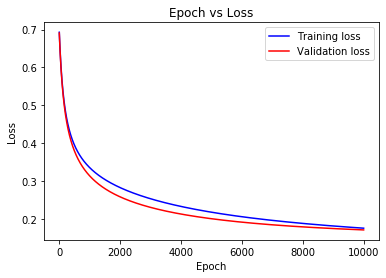

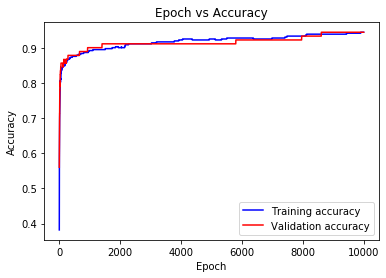

Training data
Accuracy 0.945054945054945


Validation data
Accuracy 0.945054945054945


In [147]:
epochs = 10000
learning_rate = 0.142

theta = np.zeros(X_train.shape[1])
# print(X_train.shape, X_test.shape, theta.shape)

bias = np.ones((X_train.shape[0], 0))
X_train = np.append(bias, X_train, axis=1)
# X = np.hstack([np.ones([X_train.shape[0],0]), X_train])

error = []
accuracy_list = []
validation_list = []
error_validation = []
for epoch in range(epochs):
    z = np.dot(X_train, theta)
    h = sigmoid(z) #hypothesis
    gradient = gradient_descent(X_train, h, Y_train.values)
    theta = theta_error(theta, learning_rate, gradient)
    error.append(error_function(h, Y_train.values))
    
    hv = sigmoid(np.dot(X_validation, theta))
    error_validation.append(error_function(hv, Y_validation.values))
    
    step_result = np.vectorize(decision_boundary)(h)
    step_accuracy = accuracy_precision_recall(step_result, Y_train.values).get("accuracy")
    accuracy_list.append(step_accuracy)
    
    
    step_result = np.vectorize(decision_boundary)(hv)
    step_accuracy = accuracy_precision_recall(step_result, Y_validation.values).get("accuracy")
    validation_list.append(step_accuracy)
#     if epoch % 1000 == 0: print('done')

plt.plot(list(range(len(error))), error, "b", label="Training loss")
plt.plot(list(range(len(error_validation))), error_validation, "r", label="Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

plt.plot(list(range(len(accuracy_list))), accuracy_list, "b", label="Training accuracy")
plt.plot(list(range(len(validation_list))), validation_list, "r", label="Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Epoch vs Accuracy")
plt.legend()
plt.show()

# plt.plot(list(range(len(theta))), theta)
# plt.show()


training_result = np.vectorize(decision_boundary)(sigmoid(np.dot(X_train, theta)))
    
print("Training data")
print("Accuracy", accuracy_precision_recall(training_result, Y_train.values).get("accuracy"))
# print("\nPrecision", accuracy_precision_recall(training_result, Y_train.values).get("precision"))
# print("Recall", accuracy_precision_recall(training_result, Y_train.values).get("recall"))


validation_result = np.vectorize(decision_boundary)(sigmoid(np.dot(X_validation, theta)))
    
print("\n\nValidation data")
print("Accuracy", accuracy_precision_recall(validation_result, Y_validation.values).get("accuracy"))
# print("\nPrecision", accuracy_precision_recall(validation_result, Y_validation.values).get("precision"))
# print("Recall", accuracy_precision_recall(validation_result, Y_validation.values).get("recall"))



In [148]:
result = np.vectorize(decision_boundary)(sigmoid(np.dot(X_test, theta)))
    
print("\n\nTesting data")
print("Accuracy", accuracy_precision_recall(result, Y_test.values).get("accuracy"))
# print("\nPrecision", accuracy_precision_recall(result, Y_test.values).get("precision"))
# print("Recall", accuracy_precision_recall(result, Y_test.values).get("recall"))



Testing data
Accuracy 0.9473684210526315


In [149]:
# Using sklearn Logistic Regression Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))


0.956140350877193
